# **Python Basics**
### *Jackson Alexander 08/06/2023*

Contents:
1. Settings
2. Importing Data
3. Grab Variables
4. Plotting Data
5. Summary Stats
6. Regression 2 Ways
7. Saving Results to Files



### This is a "Markdown" Cell
Its syntax has a one-to-one correspondence with HTML tags.

You can even type equations in LaTeX:

$\hat{\beta} = (X'X)^{-1} (X'Y)$


## **1. Settings**
Here is where I import all packages to be used, along with a comment of how they're used:

In [22]:
import pandas as pd # pandas is used for importing data and basic data manipulation with dataframes
import numpy as np # numpy is an array package
import matplotlib.pyplot as plt # for figures/plots
import statsmodels.api as sm # regression models and more
import requests # to request data from any API
# I chose the most common naming conventions that you'll see on stack overflow
# (pd for pandas, np for numpy)

## **2. Importing Data**
What pandas can import: .csv, .xls/.xlsx, .txt, .dta (Stata), even URLs, SQL files, and a lot more

In [23]:
# CSV:
df_csv = pd.read_csv('data//cons-save-inc.csv') # read csv file with a header (default), default delimiter is comma (can be changed with ",sep=")
# result of pd.read_csv is called a dataframe (not really an array, basically like a table in Matlab)
print('Dataframe from CSV:','\n','-'*20,'\n',df_csv.iloc[:5]) # printout of first 5 rows (index [:5] gets "all but 5", rows 0-4) of dataframe (with headers)

# Dataframe to array:
array_csv = df_csv.to_numpy() # automatically reads pandas df to an array without the header
# note: you can also just type 'df_csv.to_numpy()' to change the original dataframe variable to a numpy array but I want to keep dataframes and arrays as seperate variables
print('\n'*3,'Numpy Array from CSV:','\n','-'*20,'\n',array_csv[:5]) # printout of first 5 rows of numpy array

# Excel:
df_xls = pd.read_excel('data//cons-save-inc.xlsx') # read excel xls/xlsx file with the header (default) to a dataframe
# everything else follows same as csv
print('\n'*3,'Dataframe from Excel:','\n','-'*20,'\n',df_xls.iloc[:5]) # printout of first 5 rows (index [:5] gets "all but 5", rows 0-4) of dataframe (with headers)

# Stata:
df_stata = pd.read_stata('data//nbasal.dta') # read Stata .dta file with the header (default) to a dataframe
print('\n'*3,'Dataframe from Stata:','\n','-'*20,'\n',df_stata.iloc[:5]) # printout of first 5 rows (index [:5] gets "all but 5", rows 0-4) of dataframe (with headers)

# Time series data:
df_GDP = pd.read_csv('data//GDPC1.csv') # import Real GDP data as dataframe 
# note: we will keep it as a dataframe (table if you will) to take advantage of pandas time series functions
df_GDP['DATE'] = pd.to_datetime(df_GDP['DATE']) # convert DATE column to datetime object
df_GDP = df_GDP.set_index('DATE') # set index of dataframe


# # importing data from API:
# # This example: BEA - GDP by Industry
# # code borrowed from https://github.com/bdecon/econ_data/blob/master/APIs/BEA.ipynb

# # request components
# api_key = 'YOUR_API_KEY' # input your api key
# base = 'https://apps.bea.gov/api/data/?&UserID={}'.format(api_key)
# get_param = '&method=GetParameterValues'
# dataset = '&DataSetName=GDPbyIndustry' # Input Dataset Name (for example, GDPbyIndustry)

# ######
# # To determine Table ID (key number):
# param = 'TableID'
# # Construct URL from parameters above
# url = '{}{}{}&ParameterName={}&ResultFormat=json'.format(base, get_param, dataset, param)

# # Request parameter information from BEA API
# r = requests.get(url).json()

# # Show the results as a table:
# print('\n'*3,'TableID:','\n','-'*20,'\n',pd.DataFrame(r['BEAAPI']['Results']['ParamValue']).set_index('Key'))

# ######
# # To determine Industry number (key number):
# param = 'Industry'

# # Construct URL from parameters above
# url = '{}{}{}&ParameterName={}&ResultFormat=json'.format(base, get_param, dataset, param)

# # Request parameter information from BEA API
# r = requests.get(url).json()

# # Show the results as a table:
# print('\n'*3,'Industry Numbers:','\n','-'*20,'\n',pd.DataFrame(r['BEAAPI']['Results']['ParamValue']).set_index('Key'))

# ######
# # get data:
# get_data = '&method=GetData'
# table_id = '&TableId=25'
# freq = '&Frequency=A'
# year = '&Year=ALL'
# fmt = '&ResultFormat=json'
# industry = '&Industry=23'  # Input industry number (example, 23 is construction industry)

# # Combined url for request
# url = '{}{}{}{}{}{}{}{}'.format(base, get_data, dataset, year, industry, table_id, freq, fmt)
# # request data
# r = requests.get(url).json()
# # put data in a dataframe
# df_api = pd.DataFrame(r['BEAAPI']['Results'][0]['Data'])
# df_api = df_api.replace('Construction', 'Gross Output') # replace column name for clarity

# df_api = df_api.set_index([pd.to_datetime(df_api['Year']), 'IndustrYDescription']) # turn year and 'IndustrYDescription' into index
# df_api = df_api['DataValue'].unstack(1) # unstack the data
# df_api = df_api.apply(pd.to_numeric) # turn data to numeric
# print('\n'*3,'Dataframe from API:','\n','-'*20,'\n',df_api)



Dataframe from CSV: 
 -------------------- 
    consumption (y1)  savings (y2)  disposable income (x1)
0              1890            30                    1920
1             11529           874                   12403
2              6026           370                    6396
3              5805          1200                    7005
4              6715           275                    6990



 Numpy Array from CSV: 
 -------------------- 
 [[ 1890    30  1920]
 [11529   874 12403]
 [ 6026   370  6396]
 [ 5805  1200  7005]
 [ 6715   275  6990]]



 Dataframe from Excel: 
 -------------------- 
    consumption (y1)  savings (y2)  disposable income (x1)
0              1890            30                    1920
1             11529           874                   12403
2              6026           370                    6396
3              5805          1200                    7005
4              6715           275                    6990



 Dataframe from Stata: 
 -------------------- 
 

## **3. Grab Variables**

In [24]:
# using 'cons-save-inc.csv'
inc = array_csv[:,2] # remember: indexing starts at 0, '[:,2]' grabs 3rd column
save = array_csv[:,1]
cons = array_csv[:,0]

## **4. Plotting Data**

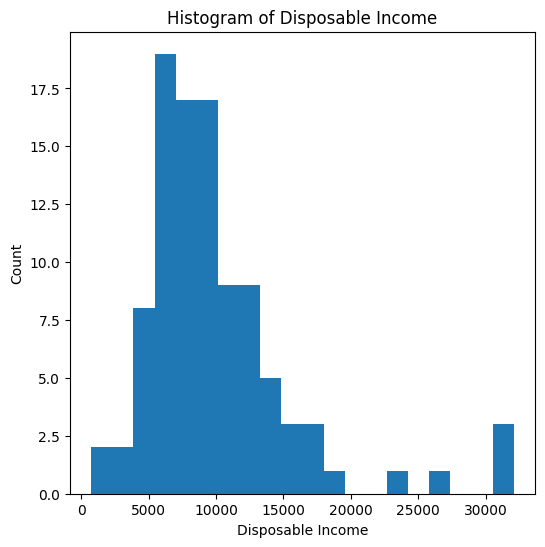

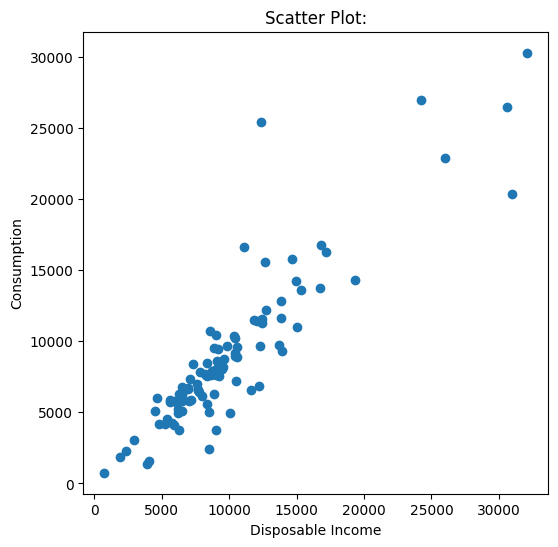

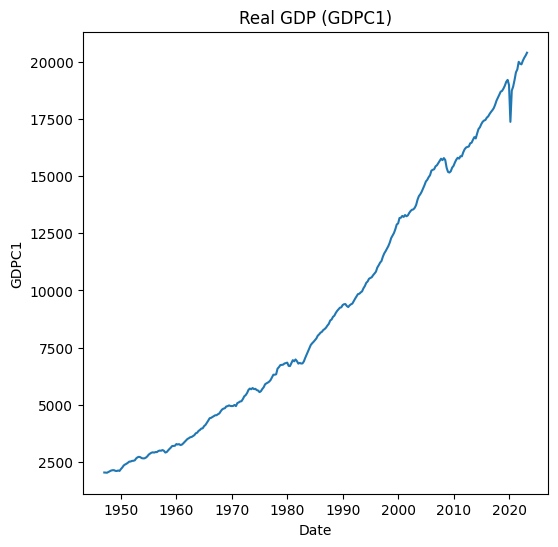

In [25]:
# histogram:
fig1 = plt.figure(figsize=(6,6))
plt.hist(inc,bins=20)
plt.xlabel('Disposable Income')
plt.ylabel('Count')
plt.title('Histogram of Disposable Income')
plt.show() # close figure to continue code (alternatively, plt.show() will immediately display figure)


# scatter plot:
fig2 = plt.figure(figsize=(6,6))
plt.scatter(inc,cons)
plt.xlabel('Disposable Income')
plt.ylabel('Consumption')
plt.title('Scatter Plot:')
plt.show() # close figure to continue code (alternatively, plt.show() will immediately display figure)


# time series plot:
fig3 = plt.figure(figsize=(6,6))
plt.plot(df_GDP.index,df_GDP['GDPC1'])
plt.xlabel('Date')
plt.ylabel('GDPC1')
plt.title('Real GDP (GDPC1)')
plt.show() # close figure to continue code (alternatively, plt.show() will immediately display figure)

## **5. Summary Stats**

In [26]:
# means:
inc_bar = np.mean(inc)
cons_bar = np.mean(cons)
# variance:
inc_var = np.var(inc)
cons_var = np.var(cons)
# building dataframe (table)
summary_array = np.array([[inc_bar,inc_var],[cons_bar,cons_var]])
summary_df = pd.DataFrame(summary_array,columns=['Mean','Var'],index=['inc','cons'])
print('\n'*3,'Means and Variances:','\n','-'*50,'\n',summary_df)
# if we just want some basic summary statistics, we can use pandas and the original dataframe from import:
gen_summary = df_csv.describe()
print('\n'*3,'Generic Summary Stats For Entire Dataset:','\n','-'*50,'\n',gen_summary)




 Means and Variances: 
 -------------------------------------------------- 
          Mean           Var
inc   9941.24  3.086922e+07
cons  8872.26  2.950579e+07



 Generic Summary Stats For Entire Dataset: 
 -------------------------------------------------- 
        consumption (y1)  savings (y2)  disposable income (x1)
count        100.000000    100.000000              100.000000
mean        8872.260000   1068.980000             9941.240000
std         5459.288253   2500.337096             5583.998057
min          750.000000 -13055.000000              750.000000
25%         5800.000000     83.750000             6510.000000
50%         7648.500000    931.000000             8776.500000
75%        10392.250000   1774.500000            11903.000000
max        30280.000000  10668.000000            32080.000000


## **6. Regression 2 Ways**

In [27]:
# Method 1: statsmodels package (imported as sm)
# documentation URL: https://www.statsmodels.org/stable/user-guide.html
# Standard OLS:
X = sm.add_constant(inc) # add constant to X matrix
Y = cons
ols = sm.OLS(Y,X) # syntax: OLS(y,x)
ols_results = ols.fit() # get results from model (homosk SE)
ols_robust_results = ols.fit(cov_type='HC1') # get White's robust standard errors (HC1=stata ',robust'), can also do cluster SEs (cov_type='cluster')
print('\n'*3,'Homoskedastic SEs:','\n',ols_results.summary(),'\n'*3,'Robust SEs:','\n',ols_robust_results.summary()) # print nice tables
# note: sm.OLS does NOT report robust standard errors without cov_type

# Method 2: create your own function using numpy arrays
def reg(Y,X,robust=None):
    # X must be n-by-k numpy array
    # Y must be n-by-1 numpy array
    # robust=True: White's robust SEs
    n = np.size(Y)
    k = np.size(X,axis=1)
    XtXi = np.linalg.inv(X.T @ X) # '@' is matrix multiplication, .T is transpose
    b = np.array(XtXi @ (X.T @ Y),ndmin=2)
    e = np.subtract(Y,(X @ b))
    if robust==True:
        # White's sandwich estimator (heteroskedasticity):
        meat = X.T @ np.diag(np.diag(e @ e.T)) @ X 
        # diag() default - gets and creates 0th diagonal (same as matlab)
        var = (n/(n-k))*(XtXi @ meat @ XtXi)
        se = np.reshape(np.sqrt(np.diag(var)),(-1,1)) 
        # '-1' autofills this size, ensures 'se' is a 2d column vector (same as b)
    else:
        # homoskedasticity:
        se = np.reshape(np.sqrt(np.diag(((e.T @ e)/(n-k))*XtXi)),(-1,1))
    results = np.concatenate((b,se),axis=1)
    return results

# a note about numpy arrays:
# the syntax for vectors is super annoying;
# vector is automatically 1d, not 2d.
# So, before concatenating, I double check the numpy array sizes 
# by printing '.shape' for each vector/array (good practice before any array operation):
print('\n'*3,'(size of ones) (size of inc)')
print(np.ones(np.size(inc)).shape,inc.shape) # what I normally print on its own
print('notice that the shapes are 1d: (100,) means a column index is not specified')
# common error:
# X = np.append(np.ones(np.size(inc)),inc,axis=1)
# out: numpy.exceptions.AxisError: axis 1 is out of bounds for array of dimension 1

# here is an amazing explanation of which numpy function to use:
# URL: https://stackoverflow.com/questions/33356442/when-should-i-use-hstack-vstack-vs-append-vs-concatenate-vs-column-stack
# (or google "hstack/vstack vs append vs concatenate vs column_stack")

# now we use the function we created:
X = np.column_stack((np.ones(np.size(inc)),inc)) # note we used 'column_stack' for 1d vectors
Y = np.array(cons,ndmin=2).T
results = reg(Y,X,robust=True)
results_df = pd.DataFrame(results,columns=['Coeff','SE'],index=['const','inc'])
print('\n'*3,'REG function robust results:','\n','-'*20,'\n',results_df)




 Homoskedastic SEs: 
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     406.9
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           1.16e-36
Time:                        13:19:00   Log-Likelihood:                -919.93
No. Observations:                 100   AIC:                             1844.
Df Residuals:                      98   BIC:                             1849.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        147.1542    49

## **7. Saving Results to Files**

In [28]:
# figures:
fig1.savefig('fig1.png')
fig2.savefig('fig2.png')
fig3.savefig('fig3.png')

# summary stats:
summary_df.to_csv('summary_means_vars.csv')
gen_summary.to_csv('generic_summary_stats.csv')
# note that the above are dataframes

# regressions:
# for statsmodels, we can access the results table
with open('ols_results.csv','w') as f:
    f.write(ols_results.summary().as_csv())

with open('ols_robust_results.csv','w') as f:
    f.write(ols_robust_results.summary().as_csv())

# for our reg function results, just save using the dataframe
results_df.to_csv('reg_function_results.csv')